In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow

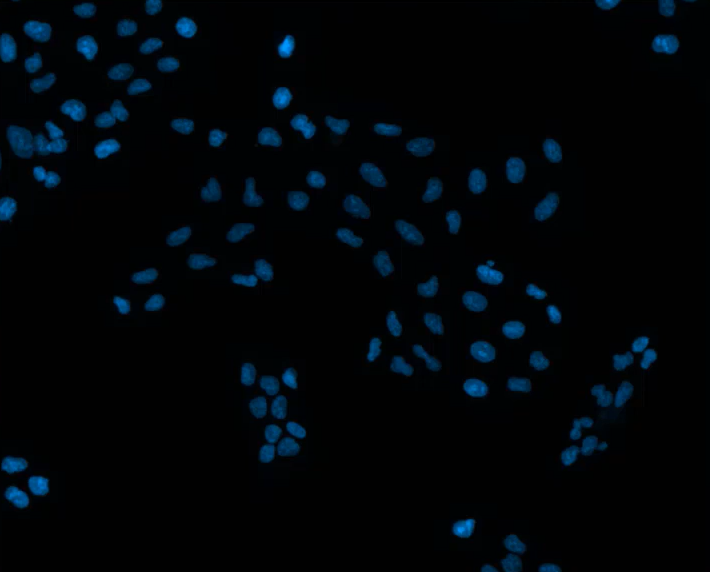

In [6]:
img = cv2.imread("/content/cell.png")
cells=img[:,:,0]
cv2_imshow(img)

In [7]:
pixels_to_um = 0.454
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
from skimage.segmentation import clear_border
opening = clear_border(opening)

In [8]:
sure_bg = cv2.dilate(opening,kernel,iterations=10)

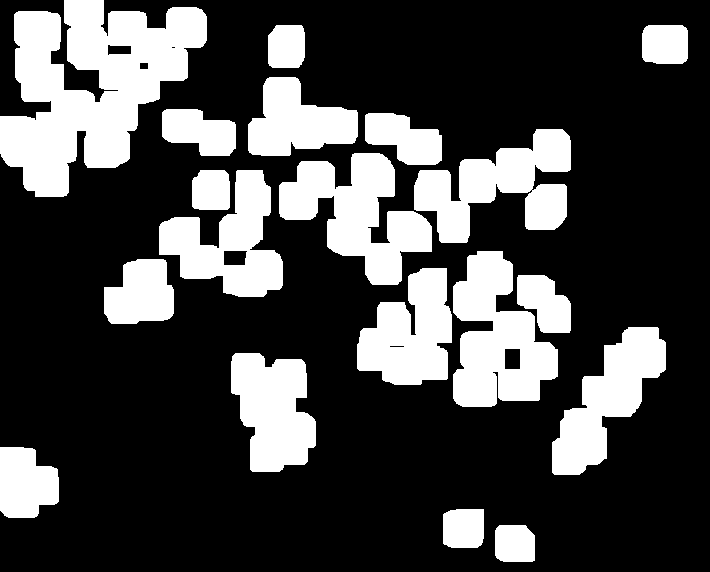

In [9]:
cv2_imshow(sure_bg)

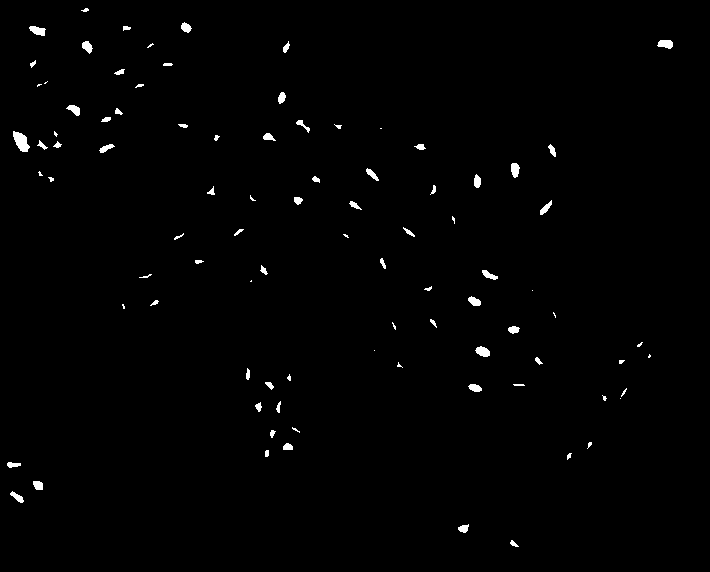

In [10]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(sure_fg)

In [11]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,255,255]

img2 = color.label2rgb(markers, bg_label=0)

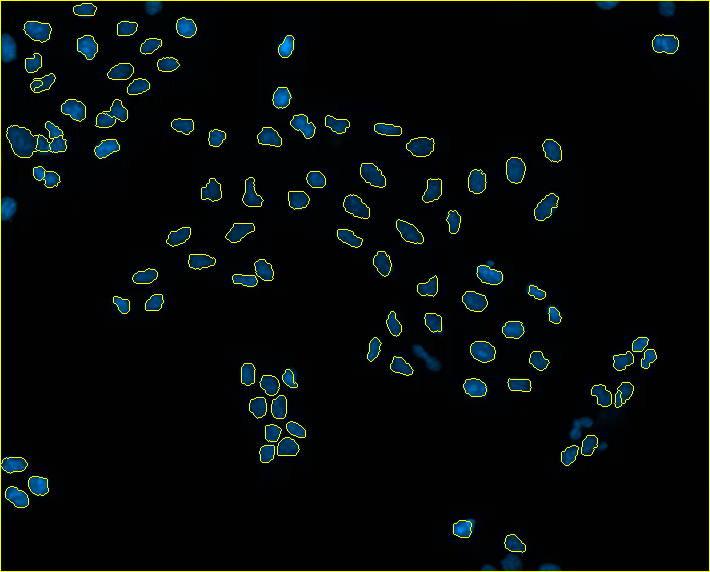

In [12]:
cv2_imshow(img)

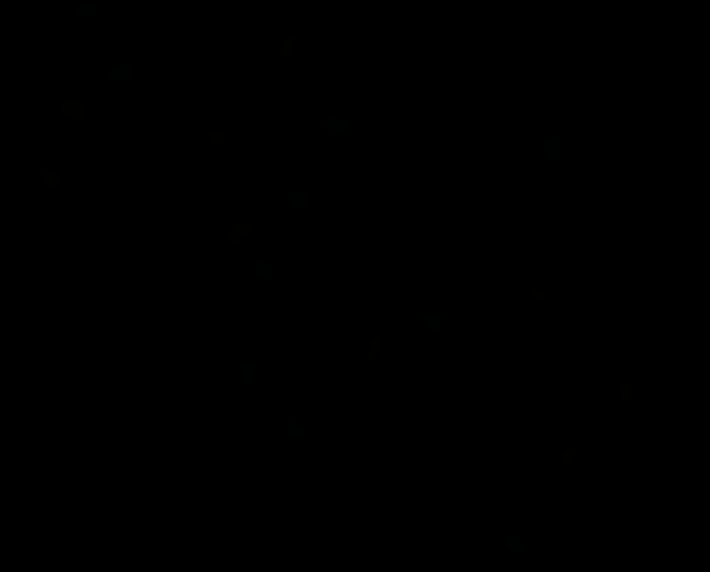

In [13]:
cv2_imshow(img2)

In [14]:
regions = measure.regionprops(markers, intensity_image=cells)

for prop in regions:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

propList = ['Area',
            'equivalent_diameter',
            'orientation',
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']
output_file = open('cell_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n')
for region_props in regions:
    output_file.write(str(region_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'):
            to_print = region_props[prop]*pixels_to_um**2
        elif(prop == 'orientation'):
            to_print = region_props[prop]*57.2958
        elif(prop.find('Intensity') < 0):
            to_print = region_props[prop]*pixels_to_um
        else:
            to_print = region_props[prop]
        output_file.write(',' + str(to_print))
    output_file.write('\n')

Label: 10 Area: 375371
Label: 11 Area: 202
Label: 12 Area: 278
Label: 13 Area: 391
Label: 14 Area: 213
Label: 15 Area: 322
Label: 16 Area: 215
Label: 17 Area: 371
Label: 18 Area: 207
Label: 19 Area: 200
Label: 20 Area: 216
Label: 21 Area: 298
Label: 22 Area: 178
Label: 23 Area: 63
Label: 24 Area: 236
Label: 25 Area: 265
Label: 26 Area: 348
Label: 27 Area: 252
Label: 28 Area: 196
Label: 29 Area: 318
Label: 30 Area: 234
Label: 31 Area: 250
Label: 32 Area: 229
Label: 33 Area: 667
Label: 34 Area: 148
Label: 35 Area: 305
Label: 36 Area: 196
Label: 37 Area: 149
Label: 38 Area: 187
Label: 39 Area: 283
Label: 40 Area: 377
Label: 41 Area: 288
Label: 42 Area: 366
Label: 43 Area: 382
Label: 44 Area: 110
Label: 45 Area: 311
Label: 46 Area: 182
Label: 47 Area: 226
Label: 48 Area: 296
Label: 49 Area: 296
Label: 50 Area: 317
Label: 51 Area: 276
Label: 52 Area: 381
Label: 53 Area: 356
Label: 54 Area: 204
Label: 55 Area: 356
Label: 56 Area: 319
Label: 57 Area: 271
Label: 58 Area: 252
Label: 59 Area: 28

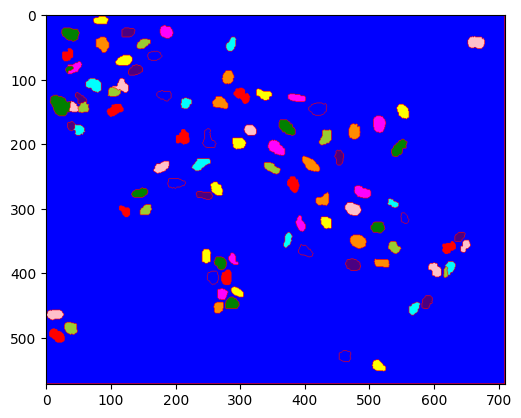

In [15]:
plt.imshow(img2)